# Exercise 1

# (a)

In [1]:
import numpy as np

# (b)

In [2]:
import matplotlib.pyplot as plt

# (c)

The solution to the sde of the problem set is a geometric brownian motion:

$\frac{dS_t}{S_t} = \mu dt + \sigma dz_t$

$dS_t = S_t\times(\mu dt + \sigma dz_t)$

with $S_0 = 100$ the initial value

Which has as unique solution the geometric brownian motion:

$ S_t = S_0e^{(\mu -\frac{1}{2}\sigma^2 )t + \sigma W_t} $

For the simulation we go as follow:

$ S_t = S_0e^{(\mu - \frac{1}{2}\sigma^2) + \sigma\sqrt{t - (t-1)}z_t }\times S_{t-1} $

In [3]:
S_0 = 100
mu = 0.06
sigma = 0.20
sigma2 = sigma**2
n = 365*10
dt = 1.0/365.0
sdt = np.sqrt(dt)
W_t= np.random.randn(n)
dz = W_t * sdt

S = S_0 * np.exp(np.cumsum(mu*dt - 0.5*sigma2*dt + sigma*dz))

time = np.arange(0,10,dt)

# (d)

[]

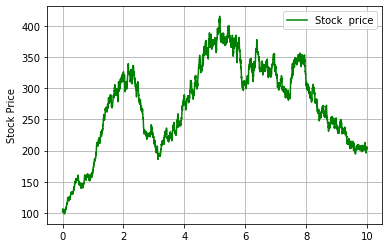

In [4]:
plt.plot(time,S,label = 'Stock  price' , color = 'green')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.plot()

# (e)

In [5]:
simple_daily_return = (S[1:]/S[:-1])
continuous_daily_return = np.log(simple_daily_return)

# (f)

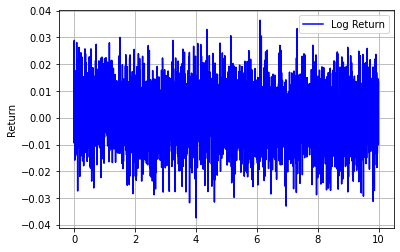

In [6]:
plt.plot(time[1:len(time)],continuous_daily_return,label = 'Log Return', color = 'blue')
plt.ylabel('Return')
plt.legend()
plt.grid()

# (g)

In [7]:
print('The annualized mean is %1.4f'%(np.mean(continuous_daily_return)*365))
print('The annualized standard deviation is %1.4f'%(np.std(continuous_daily_return)*np.sqrt(365)))

The annualized mean is 0.0704
The annualized standard deviation is 0.1987


# Exercise 2


# (a)

In [8]:
import pandas as pd

# (b)

In [9]:
index = pd.period_range(start='1950-01-01',end='2021-12-31',freq='D')
n = len(index)
dt = 72/n
sdt = np.sqrt(dt)
W_t= np.random.randn(n)
dz = W_t * sdt
data = S_0 * np.exp(np.cumsum(mu*dt - 0.5*sigma2*dt + sigma*dz))
daily_share_price = pd.Series(data,index)

# (c)

Our sample has  26298  observations


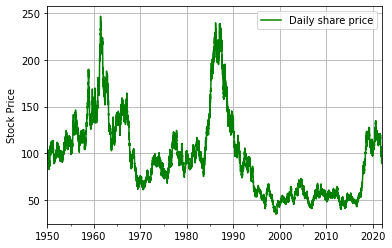

In [10]:
print('Our sample has ', n , ' observations')
daily_share_price.plot(label = 'Daily share price', color = 'green')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()

# (d)

In [11]:
monthly_share_price = daily_share_price.resample('M').mean()
new_n = len(monthly_share_price)
print('Our new sample has ', new_n , ' observations')

Our new sample has  864  observations


# (e)

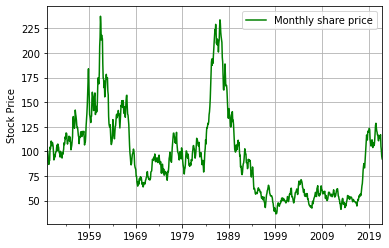

In [12]:
monthly_share_price.plot(label = 'Monthly share price', color = 'green')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()

# Exercise 3

# (a)

In [13]:
daily_log_return = np.log(daily_share_price/daily_share_price.shift(1))
weekly_share_price = daily_share_price.resample('W').first()
weekly_log_return = np.log(weekly_share_price/weekly_share_price.shift(1))
monthly_share_price = daily_share_price.resample('M').first()
monthly_log_return = np.log(monthly_share_price/monthly_share_price.shift(1))

# (b)

In [14]:
print('Summary Statistics for log returns are: ')
pd.concat([daily_log_return.describe().rename("Daily"),weekly_log_return.describe().rename("Weekly"),monthly_log_return.describe().rename("Monthly")], axis = 1)

Summary Statistics for log returns are: 


,Daily,Weekly,Monthly
count,26297.000000,3757.000000,863.000000
mean,-0.000004,-0.000018,-0.000077
std,0.010557,0.027815,0.056441
min,-0.039415,-0.103903,-0.177991
25%,-0.007110,-0.018603,-0.038586
50%,0.000079,0.000185,0.001255
75%,0.007115,0.018347,0.039480
max,0.044482,0.111374,0.175925


# (c)

In [15]:
print('Summary Statistics for log returns  annualized are: ')
data = {'Frequency':['Mean','Std'],'Daily':[(365*daily_log_return.mean()),(np.sqrt(365)*daily_log_return.std())] , 'Weekly':[(52*weekly_log_return.mean()) , (np.sqrt(52)*weekly_log_return.std())] , 'Monthly':[(12*monthly_log_return.mean()) , (np.sqrt(12)*monthly_log_return.std())]}
data        
table=pd.DataFrame(data)
#table


       

Summary Statistics for log returns  annualized are: 


# (d)

In [16]:
daily_rolling_annualized_mean = 365*daily_log_return.rolling(365, center = True).mean()
daily_rolling_annualized_std = np.sqrt(365)*daily_log_return.rolling(365,center = True).std()

weekly_rolling_annualized_mean = 52*weekly_log_return.rolling(52, center = True).mean()
weekly_rolling_annualized_std = np.sqrt(52)*weekly_log_return.rolling(52,center = True).std()

monthly_rolling_annualized_mean = 12*monthly_log_return.rolling(12, center = True).mean()
monthly_rolling_annualized_std = np.sqrt(12)*monthly_log_return.rolling(12,center = True).std()


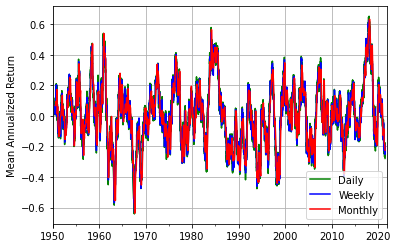

In [17]:
daily_rolling_annualized_mean.plot(label = 'Daily', color = 'green')
weekly_rolling_annualized_mean.plot(label = 'Weekly' , color = 'blue')
monthly_rolling_annualized_mean.plot(label = 'Monthly' , color = 'red')
plt.ylabel('Mean Annualized Return')
plt.legend()
plt.grid()

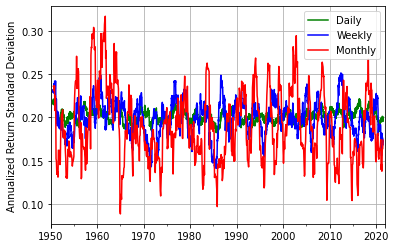

In [18]:
daily_rolling_annualized_std.plot(label = 'Daily', color = 'green')
weekly_rolling_annualized_std.plot(label = 'Weekly' , color = 'blue')
monthly_rolling_annualized_std.plot(label = 'Monthly' , color = 'red')
plt.ylabel('Annualized Return Standard Deviation')
plt.legend()
plt.grid()

# (e)

In the previous question we obtained the course result.

For the Mean estimator:

The mean and the standard deviation of this estimator are the same across all the the different sampling frequencies.

For the standard deviation estimator:

The mean of this estimator is endeed the same across all the different sampling frequencies but the variance of the estimatore decreases with the sampling frequencies.

This result are coherent with the lecture, see slides 7-11 in the lecture 1

# (f)

In [19]:
daily_annualized_mean = daily_log_return.resample('Y').agg(lambda x: x.mean()*365)
daily_annualized_std = daily_log_return.resample('Y').agg(lambda x: (x**2).mean() * 365)

weekly_annualized_mean = weekly_log_return.resample('Y').agg(lambda x: x.mean()*52)
weekly_annualized_std = weekly_log_return.resample('Y').agg(lambda x: (x**2).mean() * 52)

monthly_annualized_mean = monthly_log_return.resample('Y').agg(lambda x: x.mean()*12)
monthly_annualized_std = monthly_log_return.resample('Y').agg(lambda x: (x**2).mean() * 12)

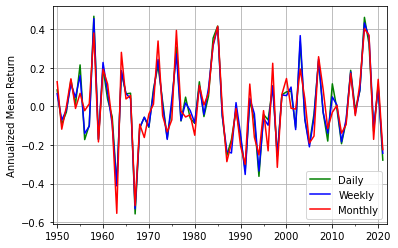

In [20]:
daily_annualized_mean.plot(label = 'Daily', color = 'green')
weekly_annualized_mean.plot(label = 'Weekly' , color = 'blue')
monthly_annualized_mean.plot(label = 'Monthly' , color = 'red')
plt.ylabel('Annualized Mean Return')
plt.legend()
plt.grid()

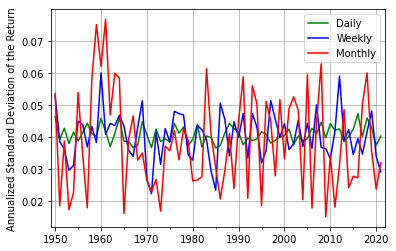

In [21]:
daily_annualized_std.plot(label = 'Daily', color = 'green')
weekly_annualized_std.plot(label = 'Weekly' , color = 'blue')
monthly_annualized_std.plot(label = 'Monthly' , color = 'red')
plt.ylabel('Annualized Standard Deviation of the Return')
plt.legend()
plt.grid()

In [22]:
print('The mean and variance of the annualized mean of the daily log returns are respectively %1.4f'%(daily_annualized_mean.mean()) , 'and %1.4f'%(daily_annualized_mean.var()))
print('The mean and variance of the annualized mean of the monthly log returns are respectively %1.4f'%(monthly_annualized_mean.mean()) , 'and %1.4f'%(monthly_annualized_mean.var()))

The mean and variance of the annualized mean of the daily log returns are respectively -0.0015 and 0.0383
The mean and variance of the annualized mean of the monthly log returns are respectively -0.0008 and 0.0399


In [23]:
print('The mean and variance of the annualized standard deviation of the daily log returns are respectively %1.4f'%(daily_annualized_std.mean()) , 'and %1.6f'%(daily_annualized_std.var()))
print('The mean and varaince of the annualized standard deviation of the monthly log returns are respectively %1.4f'%(monthly_annualized_std.mean()) , 'and %1.6f'%(monthly_annualized_std.var()))

The mean and variance of the annualized standard deviation of the daily log returns are respectively 0.0407 and 0.000007
The mean and varaince of the annualized standard deviation of the monthly log returns are respectively 0.0382 and 0.000237


For the Mean:

The theoretical variance is equal to $\frac{\sigma^2}{T} = \frac{0.2^2}{1} = 0.04 $. Here we obtain a value close to $0.04$.
The mean of the estimator is really close to the theoretical value (unbiased), not exactly the same but it could be explained by the variance of this estimator which is big.

For the Standard Deviation:

The theoritical variance of the Merton is $\frac{2 \sigma^4}{n}+4 \mu^2 \sigma^2 \frac{T}{n^2} $, for daily log return with T=1, N=365 we get a theoritical variance of 0.000219 in contrast to the estimated variance of 0.000009.
or monthly log return we have T=1 and N =12 and thus 0.00667 in contrast to 0.000262.

Concerning the mean of the estimator, in theory we have $\sigma^2+ \mu^2\frac{T}{N}$. 
For daily log return T=1, N=365 we have in treory 0.0400098 in pratic 0.0401. 
For monthly log return T=1, N=12 we have in theory 0.0403 in pratice 0.0417.

Which is quite close to the theory. The difference can be explain as they are estimators.

# Exercise 4

In [24]:
pip install wrds

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [26]:
import wrds
import psycopg2
db = wrds.Connection(wrds_username='thomas_bienaime')
db.create_pgpass_file()

Enter your WRDS username [thomas_bienaime]:grimaux
Enter your password:········
WRDS recommends setting up a .pgpass file.
Create .pgpass file now [y/n]?: y
Created .pgpass file successfully.
Loading library list...
Done


# AAPL

In [27]:
aapl = db.raw_sql("select date, ret from crsp.dsf where permco in (7) and date>='2001-01-01' and date<='2021-12-31'")
aapl.to_csv('AAPL.csv')
pd.read_csv('AAPL.csv')

,Unnamed: 0,date,ret
0,0,2001-01-02,0.000000
1,1,2001-01-03,0.100840
2,2,2001-01-04,0.041985
3,3,2001-01-05,-0.040293
4,4,2001-01-08,0.011450
...,...,...,...
5279,5279,2021-12-27,0.022975
5280,5280,2021-12-28,-0.005767
5281,5281,2021-12-29,0.000502
5282,5282,2021-12-30,-0.006578


In [28]:
aapl["Log Return"] = np.log(1 + aapl["ret"])
aapl["date"] = pd.to_datetime(aapl["date"])
aapl_weekly = aapl.resample('W' , on = 'date').sum()
aapl_monthly = aapl.resample('M' , on = 'date').sum()

In [29]:
print('Summary Statistics for log returns of AAPL are: ')
pd.concat([aapl["Log Return"].describe().rename("Daily"),aapl_weekly["Log Return"].describe().rename("Weekly"),aapl_monthly["Log Return"].describe().rename("Monthly")], axis = 1)

Summary Statistics for log returns of AAPL are: 


,Daily,Weekly,Monthly
count,5284.000000,1096.000000,252.000000
mean,0.001260,0.006076,0.026425
std,0.022862,0.048005,0.102597
min,-0.197470,-0.278471,-0.399818
25%,-0.009418,-0.020950,-0.032266
50%,0.000956,0.007778,0.042708
75%,0.012588,0.033978,0.092847
max,0.130194,0.236207,0.374168


In [65]:
print('Apple Summary Statistics for log returns  annualized are: ')
data = {'Frequency':['Mean','Std'],'Daily':[251 * aapl["Log Return"].mean(),(np.sqrt(251)*aapl["Log Return"].std())] , 'Weekly':[(52*aapl_weekly["Log Return"].mean()) , (np.sqrt(52)*aapl_weekly["Log Return"].std())] , 'Monthly':[(12*aapl_monthly["Log Return"].mean()) , (np.sqrt(12)*aapl_monthly["Log Return"].std())]}    
table=pd.DataFrame(data)
table

Apple Summary Statistics for log returns  annualized are: 


,Frequency,Daily,Weekly,Monthly
0,Mean,0.316317,0.315940,0.317097
1,Std,0.362199,0.346172,0.355406


In [31]:
aapl["Ann Log Return mean"] = 251*aapl["Log Return"].rolling(251, center = True).mean()
aapl["Ann Log Return std"] = np.sqrt(251)*aapl["Log Return"].rolling(251,center = True).std()

aapl_weekly["Ann Log Return mean"] = 52*aapl_weekly["Log Return"].rolling(52, center = True).mean()
aapl_weekly["Ann Log Return std"] = np.sqrt(52)*aapl_weekly["Log Return"].rolling(52,center = True).std()

aapl_monthly["Ann Log Return mean"] = 12*aapl_monthly["Log Return"].rolling(12, center = True).mean()
aapl_monthly["Ann Log Return std"] = np.sqrt(12)*aapl_monthly["Log Return"].rolling(12,center = True).std()

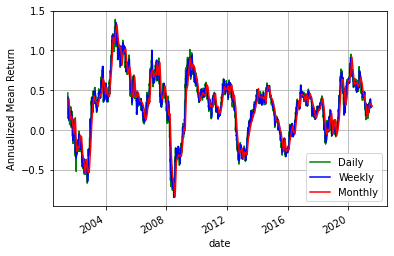

In [32]:
plt.plot(aapl["date"] , aapl["Ann Log Return mean"] , label = 'Daily', color = 'green')
aapl_weekly["Ann Log Return mean"].plot(label = 'Weekly' , color = 'blue')
aapl_monthly["Ann Log Return mean"].plot(label = 'Monthly' , color = 'red')
plt.ylabel('Annualized Mean Return')
plt.legend()
plt.grid()

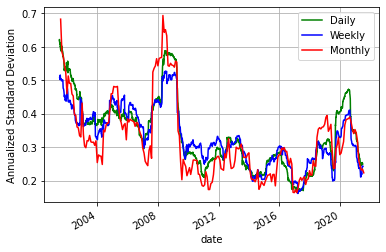

In [33]:
plt.plot(aapl["date"] , aapl["Ann Log Return std"] , label = 'Daily', color = 'green')
aapl_weekly["Ann Log Return std"].plot(label = 'Weekly' , color = 'blue')
aapl_monthly["Ann Log Return std"].plot(label = 'Monthly' , color = 'red')
plt.ylabel('Annualized Standard Deviation')
plt.legend()
plt.grid()

# MSFT

In [34]:
msft = db.raw_sql("select date, ret from crsp.dsf where permco in (8048) and date>='2001-01-01' and date<='2021-12-31'")
msft.to_csv('MSFT.csv')
pd.read_csv('MSFT.csv')

,Unnamed: 0,date,ret
0,0,2001-01-02,0.000000
1,1,2001-01-03,0.105187
2,2,2001-01-04,0.010430
3,3,2001-01-05,0.014194
4,4,2001-01-08,-0.003817
...,...,...,...
5279,5279,2021-12-27,0.023186
5280,5280,2021-12-28,-0.003504
5281,5281,2021-12-29,0.002051
5282,5282,2021-12-30,-0.007691


In [35]:
msft["Log Return"] = np.log(1 + msft["ret"])
msft["date"] = pd.to_datetime(msft["date"])
msft_weekly = msft.resample('W' , on = 'date').sum()
msft_monthly = msft.resample('M' , on = 'date').sum()

In [36]:
print('Summary Statistics for log returns of MSFT are: ')
pd.concat([msft["Log Return"].describe().rename("Daily"),msft_weekly["Log Return"].describe().rename("Weekly"),msft_monthly["Log Return"].describe().rename("Monthly")], axis = 1)

Summary Statistics for log returns of MSFT are: 


,Daily,Weekly,Monthly
count,5284.000000,1096.000000,252.000000
mean,0.000605,0.002919,0.012695
std,0.018053,0.035687,0.070840
min,-0.159453,-0.202276,-0.178358
25%,-0.007694,-0.015596,-0.034520
50%,0.000383,0.002826,0.019096
75%,0.008978,0.021795,0.053876
max,0.170626,0.149357,0.342015


In [37]:
print('MSFT Summary Statistics for log returns  annualized are: ')
data = {'Frequency':['Mean','Std'],'Daily':[251 * msft["Log Return"].mean(),(np.sqrt(251)*msft["Log Return"].std())] , 'Weekly':[(52*msft_weekly["Log Return"].mean()) , (np.sqrt(52)*msft_weekly["Log Return"].std())] , 'Monthly':[(12*msft_monthly["Log Return"].mean()) , (np.sqrt(12)*msft_monthly["Log Return"].std())]}
        
table=pd.DataFrame(data)
table

MSFT Summary Statistics for log returns  annualized are: 


,Frequency,Daily,Weekly,Monthly
0,Mean,0.151963,0.151782,0.152338
1,Std,0.286009,0.257339,0.245397


In [38]:
msft["Ann Log Return mean"] = 251*msft["Log Return"].rolling(251, center = True).mean()
msft["Ann Log Return std"] = np.sqrt(251)*msft["Log Return"].rolling(251,center = True).std()

msft_weekly["Ann Log Return mean"] = 52*msft_weekly["Log Return"].rolling(52, center = True).mean()
msft_weekly["Ann Log Return std"] = np.sqrt(52)*msft_weekly["Log Return"].rolling(52,center = True).std()

msft_monthly["Ann Log Return mean"] = 12*msft_monthly["Log Return"].rolling(12, center = True).mean()
msft_monthly["Ann Log Return std"] = np.sqrt(12)*msft_monthly["Log Return"].rolling(12,center = True).std()

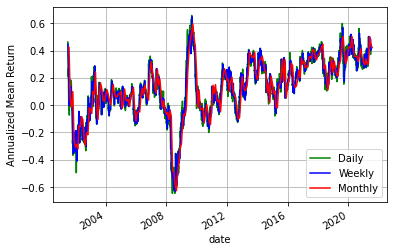

In [39]:
plt.plot(msft["date"] , msft["Ann Log Return mean"] , label = 'Daily', color = 'green')
msft_weekly["Ann Log Return mean"].plot(label = 'Weekly' , color = 'blue')
msft_monthly["Ann Log Return mean"].plot(label = 'Monthly' , color = 'red')
plt.ylabel('Annualized Mean Return')
plt.legend()
plt.grid()

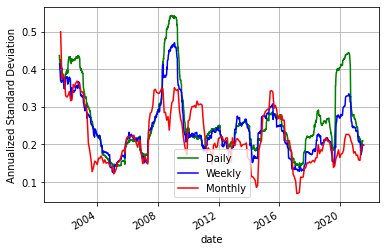

In [40]:
plt.plot(msft["date"] , msft["Ann Log Return std"] , label = 'Daily', color = 'green')
msft_weekly["Ann Log Return std"].plot(label = 'Weekly' , color = 'blue')
msft_monthly["Ann Log Return std"].plot(label = 'Monthly' , color = 'red')
plt.ylabel('Annualized Standard Deviation')
plt.legend()
plt.grid()

# PG

In [41]:
pg = db.raw_sql("select date, ret from crsp.dsf where permco in (21446) and date>='2001-01-01' and date<='2021-12-31'")
pg.to_csv('PG.csv')
pd.read_csv('PG.csv')

,Unnamed: 0,date,ret
0,0,2001-01-02,0.000797
1,1,2001-01-03,-0.049363
2,2,2001-01-04,-0.030988
3,3,2001-01-05,0.036301
4,4,2001-01-08,0.021685
...,...,...,...
5279,5279,2021-12-27,0.011680
5280,5280,2021-12-28,0.005371
5281,5281,2021-12-29,0.008290
5282,5282,2021-12-30,-0.008649


In [42]:
pg["Log Return"] = np.log(1 + pg["ret"])
pg["date"] = pd.to_datetime(pg["date"])
pg_weekly = pg.resample('W' , on = 'date').sum()
pg_monthly = pg.resample('M' , on = 'date').sum()

In [43]:
print('Summary Statistics for log returns of PG are: ')
pd.concat([pg["Log Return"].describe().rename("Daily"),pg_weekly["Log Return"].describe().rename("Weekly"),pg_monthly["Log Return"].describe().rename("Monthly")], axis = 1)

Summary Statistics for log returns of PG are: 


,Daily,Weekly,Monthly
count,5284.000000,1096.000000,252.000000
mean,0.000378,0.001821,0.007921
std,0.011738,0.024011,0.043256
min,-0.091428,-0.175977,-0.123464
25%,-0.004993,-0.009541,-0.018591
50%,0.000441,0.002398,0.009014
75%,0.005965,0.015086,0.034200
max,0.113409,0.122933,0.123469


In [44]:
print('PG Summary Statistics for log returns  annualized are: ')
data = {'Frequency':['Mean','Std'],'Daily':[251 * pg["Log Return"].mean(),(np.sqrt(251)*pg["Log Return"].std())] , 'Weekly':[(52*pg_weekly["Log Return"].mean()) , (np.sqrt(52)*pg_weekly["Log Return"].std())] , 'Monthly':[(12*pg_monthly["Log Return"].mean()) , (np.sqrt(12)*pg_monthly["Log Return"].std())]}
        
table=pd.DataFrame(data)
table

PG Summary Statistics for log returns  annualized are: 


,Frequency,Daily,Weekly,Monthly
0,Mean,0.094817,0.094704,0.095051
1,Std,0.185961,0.173146,0.149841


In [45]:
pg["Ann Log Return mean"] = 251*pg["Log Return"].rolling(251, center = True).mean()
pg["Ann Log Return std"] = np.sqrt(251)*pg["Log Return"].rolling(251,center = True).std()

pg_weekly["Ann Log Return mean"] = 52*pg_weekly["Log Return"].rolling(52, center = True).mean()
pg_weekly["Ann Log Return std"] = np.sqrt(52)*pg_weekly["Log Return"].rolling(52,center = True).std()

pg_monthly["Ann Log Return mean"] = 12*pg_monthly["Log Return"].rolling(12, center = True).mean()
pg_monthly["Ann Log Return std"] = np.sqrt(12)*pg_monthly["Log Return"].rolling(12,center = True).std()

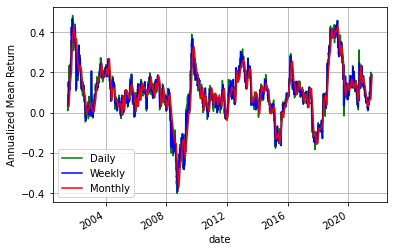

In [46]:
plt.plot(pg["date"] , pg["Ann Log Return mean"] , label = 'Daily', color = 'green')
pg_weekly["Ann Log Return mean"].plot(label = 'Weekly' , color = 'blue')
pg_monthly["Ann Log Return mean"].plot(label = 'Monthly' , color = 'red')
plt.ylabel('Annualized Mean Return')
plt.legend()
plt.grid()

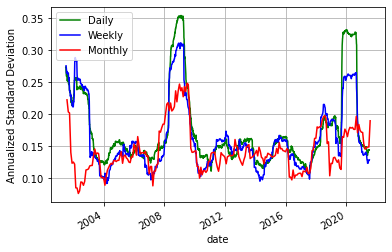

In [47]:
plt.plot(pg["date"] , pg["Ann Log Return std"] , label = 'Daily', color = 'green')
pg_weekly["Ann Log Return std"].plot(label = 'Weekly' , color = 'blue')
pg_monthly["Ann Log Return std"].plot(label = 'Monthly' , color = 'red')
plt.ylabel('Annualized Standard Deviation')
plt.legend()
plt.grid()

# GE

In [48]:
ge = db.raw_sql("select date, ret from crsp.dsf where permco in (20792) and date>='2001-01-01' and date<='2021-12-31'")
ge.to_csv('GE.csv')
pd.read_csv('GE.csv')

,Unnamed: 0,date,ret
0,0,2001-01-02,-0.087353
1,1,2001-01-03,0.092857
2,2,2001-01-04,0.005229
3,3,2001-01-05,-0.015605
4,4,2001-01-08,-0.036988
...,...,...,...
5279,5279,2021-12-27,0.006596
5280,5280,2021-12-28,0.007187
5281,5281,2021-12-29,-0.005352
5282,5282,2021-12-30,-0.000950


In [49]:
ge["Log Return"] = np.log(1 + ge["ret"])
ge["date"] = pd.to_datetime(ge["date"])
ge_weekly = ge.resample('W' , on = 'date').sum()
ge_monthly = ge.resample('M' , on = 'date').sum()

In [50]:
print('Summary Statistics for log returns of GE are: ')
pd.concat([ge["Log Return"].describe().rename("Daily"),ge_weekly["Log Return"].describe().rename("Weekly"),ge_monthly["Log Return"].describe().rename("Monthly")], axis = 1)

Summary Statistics for log returns of GE are: 


,Daily,Weekly,Monthly
count,5284.000000,1096.000000,252.000000
mean,-0.000148,-0.000716,-0.003112
std,0.021017,0.044587,0.086534
min,-0.164394,-0.228878,-0.324090
25%,-0.008607,-0.019232,-0.043127
50%,0.000000,-0.000332,-0.004021
75%,0.008487,0.020954,0.043124
max,0.179844,0.309399,0.316246


In [51]:
print('GE Summary Statistics for log returns  annualized are: ')
data = {'Frequency':['Mean','Std'],'Daily':[251 * ge["Log Return"].mean(),(np.sqrt(251)*ge["Log Return"].std())] , 'Weekly':[(52*ge_weekly["Log Return"].mean()) , (np.sqrt(52)*ge_weekly["Log Return"].std())] , 'Monthly':[(12*ge_monthly["Log Return"].mean()) , (np.sqrt(12)*ge_monthly["Log Return"].std())]}
        
table=pd.DataFrame(data)
table

GE Summary Statistics for log returns  annualized are: 


,Frequency,Daily,Weekly,Monthly
0,Mean,-0.037252,-0.037207,-0.037344
1,Std,0.332971,0.321521,0.299764


In [52]:
ge["Ann Log Return mean"] = 251*ge["Log Return"].rolling(251, center = True).mean()
ge["Ann Log Return std"] = np.sqrt(251)*ge["Log Return"].rolling(251,center = True).std()

ge_weekly["Ann Log Return mean"] = 52*ge_weekly["Log Return"].rolling(52, center = True).mean()
ge_weekly["Ann Log Return std"] = np.sqrt(52)*ge_weekly["Log Return"].rolling(52,center = True).std()

ge_monthly["Ann Log Return mean"] = 12*ge_monthly["Log Return"].rolling(12, center = True).mean()
ge_monthly["Ann Log Return std"] = np.sqrt(12)*ge_monthly["Log Return"].rolling(12,center = True).std()

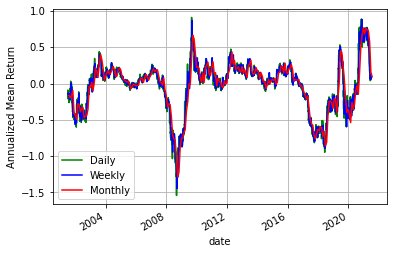

In [53]:
plt.plot(ge["date"] , ge["Ann Log Return mean"] , label = 'Daily', color = 'green')
ge_weekly["Ann Log Return mean"].plot(label = 'Weekly' , color = 'blue')
ge_monthly["Ann Log Return mean"].plot(label = 'Monthly' , color = 'red')
plt.ylabel('Annualized Mean Return')
plt.legend()
plt.grid()

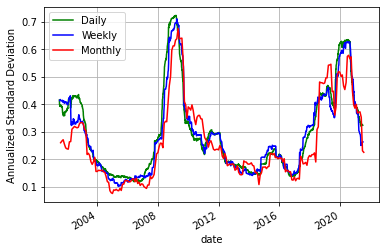

In [54]:
plt.plot(ge["date"] , ge["Ann Log Return std"] , label = 'Daily', color = 'green')
ge_weekly["Ann Log Return std"].plot(label = 'Weekly' , color = 'blue')
ge_monthly["Ann Log Return std"].plot(label = 'Monthly' , color = 'red')
plt.ylabel('Annualized Standard Deviation')
plt.legend()
plt.grid()

# GS

In [55]:
gs = db.raw_sql("select date, ret from crsp.dsf where permco in (35048) and date>='2001-01-01' and date<='2021-12-31'")
gs.to_csv('GS.csv')
pd.read_csv('GS.csv')

,Unnamed: 0,date,ret
0,0,2001-01-02,-0.062537
1,1,2001-01-03,0.152120
2,2,2001-01-04,-0.023810
3,3,2001-01-05,-0.043237
4,4,2001-01-08,-0.013905
...,...,...,...
5279,5279,2021-12-27,0.007791
5280,5280,2021-12-28,-0.001108
5281,5281,2021-12-29,-0.003638
5282,5282,2021-12-30,-0.001761


In [56]:
gs["Log Return"] = np.log(1 + gs["ret"])
gs["date"] = pd.to_datetime(gs["date"])
gs_weekly = gs.resample('W' , on = 'date').sum()
gs_monthly = gs.resample('M' , on = 'date').sum()

In [57]:
print('Summary Statistics for log returns of GS are: ')
pd.concat([gs["Log Return"].describe().rename("Daily"),gs_weekly["Log Return"].describe().rename("Weekly"),gs_monthly["Log Return"].describe().rename("Monthly")], axis = 1)

Summary Statistics for log returns of GS are: 


,Daily,Weekly,Monthly
count,5284.000000,1096.000000,252.000000
mean,0.000290,0.001397,0.006074
std,0.022359,0.047488,0.086185
min,-0.210223,-0.365644,-0.321603
25%,-0.009845,-0.022425,-0.050203
50%,0.000341,0.003369,0.015757
75%,0.010757,0.025711,0.059171
max,0.234818,0.393197,0.210329


In [58]:
print('GS Summary Statistics for log returns  annualized are: ')
data = {'Frequency':['Mean','Std'],'Daily':[251 * gs["Log Return"].mean(),(np.sqrt(251)*gs["Log Return"].std())] , 'Weekly':[(52*gs_weekly["Log Return"].mean()) , (np.sqrt(52)*gs_weekly["Log Return"].std())] , 'Monthly':[(12*gs_monthly["Log Return"].mean()) , (np.sqrt(12)*gs_monthly["Log Return"].std())]}
        
table=pd.DataFrame(data)
table

GS Summary Statistics for log returns  annualized are: 


,Frequency,Daily,Weekly,Monthly
0,Mean,0.072706,0.072619,0.072885
1,Std,0.354230,0.342438,0.298553


In [59]:
gs["Ann Log Return mean"] = 251*gs["Log Return"].rolling(251, center = True).mean()
gs["Ann Log Return std"] = np.sqrt(251)*gs["Log Return"].rolling(251,center = True).std()

gs_weekly["Ann Log Return mean"] = 52*gs_weekly["Log Return"].rolling(52, center = True).mean()
gs_weekly["Ann Log Return std"] = np.sqrt(52)*gs_weekly["Log Return"].rolling(52,center = True).std()

gs_monthly["Ann Log Return mean"] = 12*gs_monthly["Log Return"].rolling(12, center = True).mean()
gs_monthly["Ann Log Return std"] = np.sqrt(12)*gs_monthly["Log Return"].rolling(12,center = True).std()

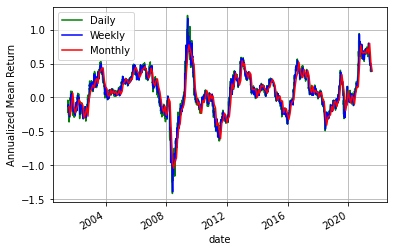

In [60]:
plt.plot(gs["date"] , gs["Ann Log Return mean"] , label = 'Daily', color = 'green')
gs_weekly["Ann Log Return mean"].plot(label = 'Weekly' , color = 'blue')
gs_monthly["Ann Log Return mean"].plot(label = 'Monthly' , color = 'red')
plt.ylabel('Annualized Mean Return')
plt.legend()
plt.grid()

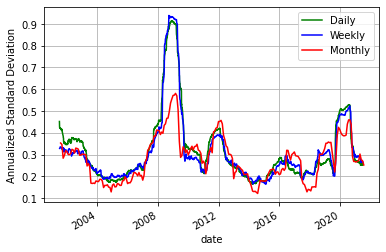

In [61]:
plt.plot(gs["date"] , gs["Ann Log Return std"] , label = 'Daily', color = 'green')
gs_weekly["Ann Log Return std"].plot(label = 'Weekly' , color = 'blue')
gs_monthly["Ann Log Return std"].plot(label = 'Monthly' , color = 'red')
plt.ylabel('Annualized Standard Deviation')
plt.legend()
plt.grid()

# Function for performing Exercise 4 more Quickly

In [62]:
## to make pretty print
from IPython.display import display

# do the analysis of exercise 4
# with parameter the daily stock return
def exo_4_analysis( daily_return : pd.Series) :
    # create the data for weekly and monthly
    daily_log_return = np.log(daily_return+1)
    weekly_log_return = daily_log_return.resample('W').sum()
    monthly_log_return = daily_log_return.resample("M").sum()

    
    # print statistic of log return
    print('Summary Statistics for log returns are: ')
    display(pd.concat([daily_log_return.describe().rename("Daily"),
           weekly_log_return.describe().rename("Weekly"),
           monthly_log_return.describe().rename("Monthly")],
          axis = 1))
    
    # print annualized mean and variance
    print('The annualized mean and standard deviation of the daily log returns are respectively %1.4f'%(251*daily_log_return.mean()) , 'and %1.4f'%(np.sqrt(251)*daily_log_return.std()))
    print('The annualized mean and standard deviation of the weekly log returns are respectively %1.4f'%(52*weekly_log_return.mean()) , 'and %1.4f'%(np.sqrt(52)*weekly_log_return.std()))
    print('The annualized mean and standard deviation of the monthly log returns are respectively %1.4f'%(12*monthly_log_return.mean()) , 'and %1.4f'%(np.sqrt(12)*monthly_log_return.std()))
    
    # calculate annualised rolling statistic
    daily_rolling_annualized_mean = 251*daily_log_return.rolling(251, center = True).mean()
    daily_rolling_annualized_std = np.sqrt(251)*daily_log_return.rolling(251,center = True).std()
    
    weekly_rolling_annualized_mean = 52*weekly_log_return.rolling(52, center = True).mean()
    weekly_rolling_annualized_std = np.sqrt(52)*weekly_log_return.rolling(52,center = True).std()
    
    monthly_rolling_annualized_mean = 12*monthly_log_return.rolling(12, center = True).mean()
    monthly_rolling_annualized_std = np.sqrt(12)*monthly_log_return.rolling(12,center = True).std()
    
    # graph annualised mean rolling statistic
    plt.figure(1)
    daily_rolling_annualized_mean.plot(label = 'Daily', color = 'green')
    weekly_rolling_annualized_mean.plot(label = 'Weekly' , color = 'blue')
    monthly_rolling_annualized_mean.plot(label = 'Monthly' , color = 'red')
    plt.legend()
    plt.title("Rolling mean")
    plt.grid()
    
    # graph annualised standard deviation rolling statistic
    plt.figure(2)
    daily_rolling_annualized_std.plot(label = 'Daily', color = 'green')
    weekly_rolling_annualized_std.plot(label = 'Weekly' , color = 'blue')
    monthly_rolling_annualized_std.plot(label = 'Monthly' , color = 'red')
    plt.legend()
    plt.title("Rolling standard deviation")
    plt.grid()

# 4.(f)

The variation of the estimator of the mean is the same across sampling frequencies which make sense with the lectures.

However, about the variation of the estimator of the standard deviation, it seems that there is no real trend. It is different from simulated data because we expected the variation of this estimator to decrease with the sampling frequencies. This can be explained by the fact that for this data, there is no homoskedasticity. This assumption is assumed for the simulated data and its explained why the results are differents.


# 4.(g)

During COVID-19, the annualized expected return evolution depends of the firm observed. For example, for Microsoft and Apple, impact of COVID-19 has not been so huge because the numerical business has expanded. It is the same for Goldman Sachs. However, for General Electric and Procter and Gamble which depends directly of the comsumption it has a strong impact and their return felt a lot.

For the standard deviation, we remark that it has increased for all firm just after the COVID-19 crisis.


On our data, we can see other financial crisis like:
    
-The dot com bubble of 2000 because for some firm the standard deviation is really high at the beginning of the data frame.

-The Subprime crisis of 2009 which is the strongest one that we can observe because it is where we observe the biggest standard deviation.